**Handling Outliers in Two Datasets**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv('/kaggle/input/data-science-day1-titanic/DSB_Day1_Titanic_train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic.shape

(891, 12)

In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Using Inter-Quartile Range to find the outliers**

In [7]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

**Function to detect if outliers are present in a column**

In [8]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

**Finding the type of columns as 'Categorical', 'Numerical', 'Cardinal'**

In [9]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O" and col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car


In [10]:
cat_cols, num_cols, cat_but_car = grab_col_names(titanic)

Observations: 891
Variables: 12
cat_cols: 6
num_cols: 3
cat_but_car: 3
num_but_cat: 4


In [11]:
num_cols = [col for col in num_cols if col != "PassengerId"]
print(num_cols)

['Age', 'Fare']


In [12]:
def grab_outliers(dataframe, col_name, outlier_index=False, f = 5):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head(f))
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if outlier_index:
        out_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return out_index

In [13]:
def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit))]
    return df_without_outliers

In [14]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [15]:
for col in num_cols:
    print(col, check_outlier(titanic, col))

Age True
Fare True


In [16]:
for col in num_cols:
    print(grab_outliers(titanic, col))

     PassengerId  Survived  Pclass                            Name   Sex  \
33            34         0       2           Wheadon, Mr. Edward H  male   
54            55         0       1  Ostby, Mr. Engelhart Cornelius  male   
96            97         0       1       Goldschmidt, Mr. George B  male   
116          117         0       3            Connors, Mr. Patrick  male   
280          281         0       3                Duane, Mr. Frank  male   

      Age  SibSp  Parch      Ticket     Fare Cabin Embarked  
33   66.0      0      0  C.A. 24579  10.5000   NaN        S  
54   65.0      0      1      113509  61.9792   B30        C  
96   71.0      0      0    PC 17754  34.6542    A5        C  
116  70.5      0      0      370369   7.7500   NaN        Q  
280  65.0      0      0      336439   7.7500   NaN        Q  
None
    PassengerId  Survived  Pclass  \
1             2         1       1   
27           28         0       1   
31           32         1       1   
34           35   

**Removing Outliers**

In [17]:
for col in num_cols:
    titanic = remove_outlier(titanic,col)

**Replacing Outliers with threshold values**

In [18]:
titanic = pd.read_csv('/kaggle/input/data-science-day1-titanic/DSB_Day1_Titanic_train.csv')

In [19]:
for col in num_cols:
    replace_with_thresholds(titanic, col)

In [20]:
for col in num_cols:
    print(col, check_outlier(titanic, col))

Age False
Fare False


**Local Outlier Factor (LOF)**

In [21]:
from sklearn.neighbors import LocalOutlierFactor

titanic_clean = titanic.dropna(subset=num_cols)
clf = LocalOutlierFactor(n_neighbors=20)
titanic_clean['LOF_outlier'] = clf.fit_predict(titanic_clean[num_cols])
titanic_scores = clf.negative_outlier_factor_
print(titanic_scores)

[-1.00066553 -1.00110123 -0.98739341 -1.00300291 -1.03187358 -1.38817817
 -0.99122615 -1.12024378 -1.11251499 -1.02126248 -1.1087688  -0.99380645
 -1.13334913 -1.411044   -1.12457928 -0.97093279 -1.16473585 -0.97341024
 -1.03889058 -1.28527515 -1.33224863 -1.01048853 -1.13875381 -1.10667655
 -1.00868242 -1.38849136 -1.17175853 -1.08125024 -0.9808391  -1.24093089
 -1.59688324 -1.01599566 -1.08094862 -1.33479172 -0.97466339 -1.24449314
 -1.19642061 -0.98358648 -0.98959823 -0.96555783 -1.41589198 -1.23339712
 -1.05787109 -0.98314817 -1.16908892 -1.00151258 -1.00110123 -1.10428471
 -0.97245322 -1.15151528 -0.97306866 -1.02897475 -1.06776989 -1.23586797
 -1.11802729 -0.97764353 -0.99962829 -1.31388254 -0.97359149 -1.00637101
 -1.00071336 -1.19064418 -1.06755605 -1.04390891 -1.26171229 -1.13733507
 -1.15671907 -0.95523572 -1.00554695 -1.03399178 -0.98934537 -1.04380792
 -1.16432082 -1.22535232 -1.22599652 -0.94534136 -1.00894874 -0.97140232
 -1.00674855 -0.97764353 -1.05146766 -1.08756707 -1

/tmp/ipykernel_18/1631410898.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_clean['LOF_outlier'] = clf.fit_predict(titanic_clean[num_cols])


In [22]:
print(np.sort(titanic_scores)[0:5])

[-5.8491443  -5.59050671 -3.24185186 -2.98980096 -2.8451541 ]


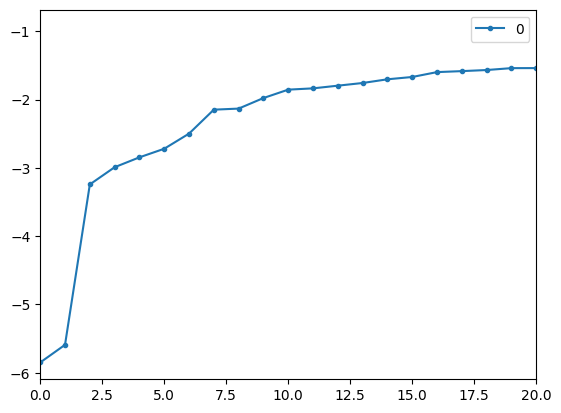

In [23]:
scores = pd.DataFrame(np.sort(titanic_scores))
scores.plot(stacked=True, xlim=[0, 20], style='.-')
plt.show() 

In [24]:
th = np.sort(titanic_scores)[10]
print(th)

-1.8538222694348583


In [25]:
print(titanic_clean[titanic_scores < th])
print(titanic_clean.drop(axis=0, labels=titanic_clean[titanic_scores < th].index).shape)

     PassengerId  Survived  Pclass                             Name     Sex  \
179          180         0       3              Leonard, Mr. Lionel    male   
263          264         0       1            Harrison, Mr. William    male   
271          272         1       3     Tornquist, Mr. William Henry    male   
297          298         0       1     Allison, Miss. Helen Loraine  female   
302          303         0       3  Johnson, Mr. William Cahoone Jr    male   
305          306         1       1   Allison, Master. Hudson Trevor    male   
378          379         0       3              Betros, Mr. Tannous    male   
445          446         1       1        Dodge, Master. Washington    male   
806          807         0       1           Andrews, Mr. Thomas Jr    male   
822          823         0       1  Reuchlin, Jonkheer. John George    male   

       Age  SibSp  Parch  Ticket     Fare    Cabin Embarked  LOF_outlier  
179  36.00      0      0    LINE   0.0000      NaN     

In [26]:
application = pd.read_csv('/kaggle/input/application-train/application_train.csv')

In [27]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
application.shape

(307511, 122)

In [29]:
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [30]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [31]:
cat_cols, num_cols, cat_but_car = grab_col_names(application)

Observations: 307511
Variables: 122
cat_cols: 54
num_cols: 67
cat_but_car: 1
num_but_cat: 39


In [32]:
num_cols.remove('SK_ID_CURR')

In [33]:
for col in num_cols:
    print(col, check_outlier(application, col))

CNT_CHILDREN True
AMT_INCOME_TOTAL True
AMT_CREDIT True
AMT_ANNUITY True
AMT_GOODS_PRICE True
REGION_POPULATION_RELATIVE True
DAYS_BIRTH False
DAYS_EMPLOYED True
DAYS_REGISTRATION True
DAYS_ID_PUBLISH False
OWN_CAR_AGE True
CNT_FAM_MEMBERS True
HOUR_APPR_PROCESS_START True
EXT_SOURCE_1 False
EXT_SOURCE_2 False
EXT_SOURCE_3 False
APARTMENTS_AVG True
BASEMENTAREA_AVG True
YEARS_BEGINEXPLUATATION_AVG True
YEARS_BUILD_AVG True
COMMONAREA_AVG True
ELEVATORS_AVG True
ENTRANCES_AVG True
FLOORSMAX_AVG True
FLOORSMIN_AVG True
LANDAREA_AVG True
LIVINGAPARTMENTS_AVG True
LIVINGAREA_AVG True
NONLIVINGAPARTMENTS_AVG True
NONLIVINGAREA_AVG True
APARTMENTS_MODE True
BASEMENTAREA_MODE True
YEARS_BEGINEXPLUATATION_MODE True
YEARS_BUILD_MODE True
COMMONAREA_MODE True
ELEVATORS_MODE True
ENTRANCES_MODE True
FLOORSMAX_MODE True
FLOORSMIN_MODE True
LANDAREA_MODE True
LIVINGAPARTMENTS_MODE True
LIVINGAREA_MODE True
NONLIVINGAPARTMENTS_MODE True
NONLIVINGAREA_MODE True
APARTMENTS_MEDI True
BASEMENTAREA_MEDI 

In [34]:
for col in num_cols:
    print(grab_outliers(application, col))

     SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
91       100108       0         Cash loans           F            N   
92       100110       0         Cash loans           M            Y   
144      100166       0         Cash loans           F            N   
180      100209       1    Revolving loans           M            N   
182      100211       0         Cash loans           M            N   

    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
91                Y             3          171000.0    545040.0      31288.5   
92                Y             3          135000.0    373140.0      25065.0   
144               Y             3           58500.0    152820.0      15241.5   
180               Y             3          180000.0    540000.0      27000.0   
182               N             3          225000.0    746280.0      49873.5   

     ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
91   ...   

**Removing Outliers**

In [35]:
for col in num_cols:
    application = remove_outlier(application,col)

In [36]:
application.shape

(68454, 122)

**Reloading Data and replacing outliers with threshold**

In [37]:
application = pd.read_csv('/kaggle/input/application-train/application_train.csv')

In [38]:
for col in num_cols:
    replace_with_thresholds(application, col)

/tmp/ipykernel_18/130684917.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
/tmp/ipykernel_18/130684917.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-30585.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
/tmp/ipykernel_18/130684917.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-6466.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
/tmp/i

In [39]:
for col in num_cols:
    print(col, check_outlier(application, col))

CNT_CHILDREN False
AMT_INCOME_TOTAL False
AMT_CREDIT False
AMT_ANNUITY False
AMT_GOODS_PRICE False
REGION_POPULATION_RELATIVE False
DAYS_BIRTH False
DAYS_EMPLOYED False
DAYS_REGISTRATION False
DAYS_ID_PUBLISH False
OWN_CAR_AGE False
CNT_FAM_MEMBERS False
HOUR_APPR_PROCESS_START False
EXT_SOURCE_1 False
EXT_SOURCE_2 False
EXT_SOURCE_3 False
APARTMENTS_AVG False
BASEMENTAREA_AVG False
YEARS_BEGINEXPLUATATION_AVG False
YEARS_BUILD_AVG False
COMMONAREA_AVG False
ELEVATORS_AVG False
ENTRANCES_AVG False
FLOORSMAX_AVG False
FLOORSMIN_AVG False
LANDAREA_AVG False
LIVINGAPARTMENTS_AVG False
LIVINGAREA_AVG False
NONLIVINGAPARTMENTS_AVG False
NONLIVINGAREA_AVG False
APARTMENTS_MODE False
BASEMENTAREA_MODE False
YEARS_BEGINEXPLUATATION_MODE False
YEARS_BUILD_MODE False
COMMONAREA_MODE False
ELEVATORS_MODE False
ENTRANCES_MODE False
FLOORSMAX_MODE False
FLOORSMIN_MODE False
LANDAREA_MODE False
LIVINGAPARTMENTS_MODE False
LIVINGAREA_MODE False
NONLIVINGAPARTMENTS_MODE False
NONLIVINGAREA_MODE False


In [40]:
application_clean = application.dropna(subset=num_cols)
clf = LocalOutlierFactor(n_neighbors=20)
application_clean['LOF_outlier'] = clf.fit_predict(application_clean[num_cols])
application_scores = clf.negative_outlier_factor_
print(application_scores)

[-1.03736615 -1.67605188 -0.99027341 ... -1.13916442 -1.10110839
 -1.16283485]


/tmp/ipykernel_18/2959207768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  application_clean['LOF_outlier'] = clf.fit_predict(application_clean[num_cols])


In [41]:
print(np.sort(application_scores)[0:5])

[-28.47759765 -16.95616146 -11.12599341  -6.28256099  -5.46849238]


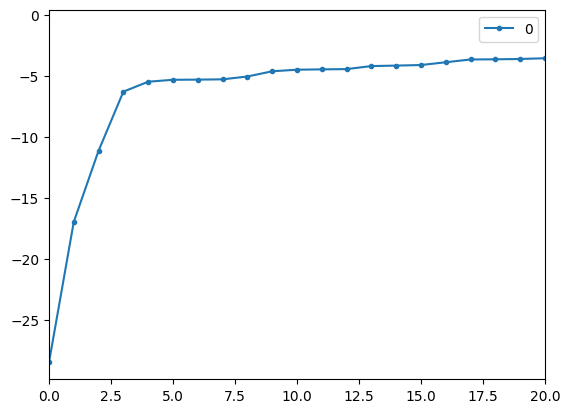

In [42]:
scores = pd.DataFrame(np.sort(application_scores))
scores.plot(stacked=True, xlim=[0, 20], style='.-')
plt.show() 

In [43]:
th = np.sort(application_scores)[4]
print(th)

-5.46849237954159


In [44]:
print(application_clean[application_scores < th])
print(application_clean.drop(axis=0, labels=application_clean[application_scores < th].index).shape)

        SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
4179        104889       0    Revolving loans           M            Y   
140226      262598       0         Cash loans           F            Y   
223013      358313       0    Revolving loans           M            Y   
230223      366662       0    Revolving loans           F            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
4179                 Y           1.0          337500.0    450000.0   
140226               N           0.0          225000.0   1616625.0   
223013               Y           0.0          135000.0    225000.0   
230223               Y           1.0          171000.0    180000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
4179        22500.0  ...                 0                0                0   
140226      47727.0  ...                 0                0                0   
223013      11250.0  ...              